In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px 

In [3]:
# Turn the link of the csv file into a dataframe
url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
medical_df = pd.read_csv(url)

### Using Categorical Features For Machine Learning 
So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals

<Axes: xlabel='smoker', ylabel='charges'>

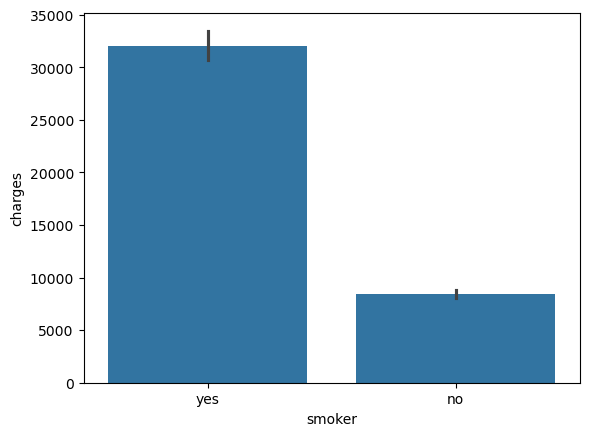

In [4]:
# Smoker plot
sns.barplot(medical_df, x = 'smoker', y = 'charges')

In [5]:
# Create a new column called smoker_code
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df['smoker'].map(smoker_codes)

In [6]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [7]:
# Check correlation between smoker and charges 
medical_df['charges'].corr(medical_df['smoker_code'])

0.7872514304984772

We can now add smoker_code into our linear regression model

In [8]:
from  sklearn.linear_model import LinearRegression

In [9]:
# Define the estimate function 
def estimate_charges(age, w, b):
    return w * age + b

In [10]:
# Define the RMSE function 
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [11]:
def try_parameters(w,b):
    ages = medical_df['age']
    target = medical_df['charges']

    estimated_charges = estimate_charges(ages, w, b) 

    plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
    plt.scatter(ages, target, s = 8, alpha = 0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimated', 'Actual'])

charges = w1 x age + w2 x bmi + w3 x children + w4 x smoker + b

In [12]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


The loss of the numerical model only reduces 11355 to 6056, almost by 50%. 

<b> Important lesson: Never ignore categorical data </b> 

Now, turn 'sex' into a columm
- charges = w1 x age + w2 x bmi + w3 x children + w4 x smoker + w5 x sex + b

<Axes: xlabel='sex', ylabel='charges'>

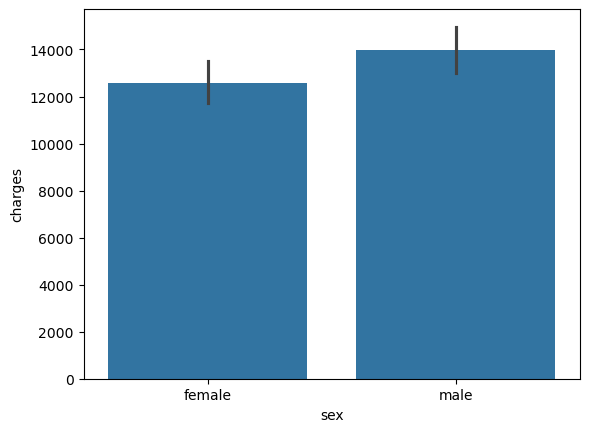

In [13]:
sns.barplot(medical_df, x = 'sex', y = 'charges')

In [14]:
sex_codes = {'female':0, 'male':1}
medical_df['sex_code'] = medical_df['sex'].map(sex_codes)

In [15]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [16]:
medical_df['sex_code'].corr(medical_df['charges'])

0.05729206220202541

Sex has a weak impact on charges, so we can expect the loss to not change much

In [17]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


In [18]:
medical_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

### One-Hot Encoding 

The 'region' columns contains 4 values: southeast, southwest, northwest, northeast. We need to use hot-encoding

![alt text](https://i.imgur.com/n8GuiOO.png)

<Axes: xlabel='region', ylabel='charges'>

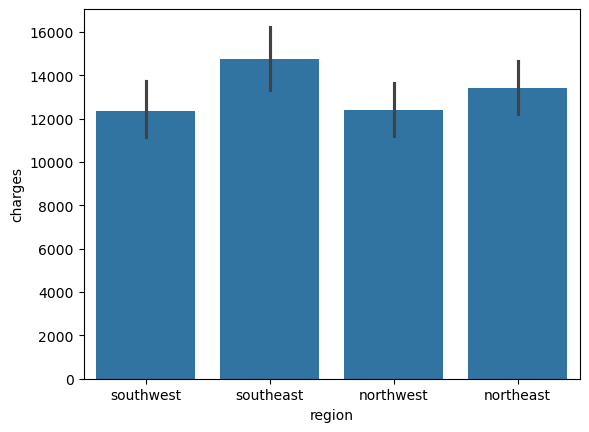

In [19]:
# Visualization
sns.barplot(medical_df, x = 'region', y = 'charges')

In [20]:
# Import the One-Hot Encoder class from scikitlearn 
from sklearn import preprocessing

In [21]:
# Create a one-hot encoder object
enc = preprocessing.OneHotEncoder()
# Identify values in the 'region' columns
enc.fit(medical_df[['region']])
# View the unique values the encoder has identified 
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [22]:
# Transform into encoder form 
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [23]:
# Assign values of one-hot to 4 newly created columns:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [24]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


#### Now, we can inlcude 'region' into our model as well 

In [25]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code','northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


#### Let's see if the linear regression model is better when we separate smokers from non-smokers, rather than combining them together

In [26]:
smoker_df = medical_df[medical_df['smoker'] == 'yes']
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.90,0,yes,southwest,16884.9240,1,0,0.0,0.0,0.0,1.0
11,62,female,26.29,0,yes,southeast,27808.7251,1,0,0.0,0.0,1.0,0.0
14,27,male,42.13,0,yes,southeast,39611.7577,1,1,0.0,0.0,1.0,0.0
19,30,male,35.30,0,yes,southwest,36837.4670,1,1,0.0,0.0,0.0,1.0
23,34,female,31.92,1,yes,northeast,37701.8768,1,0,1.0,0.0,0.0,0.0


In [27]:
non_smoker_df = medical_df[medical_df['smoker'] == 'no'] 
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
5,31,female,25.740,0,no,southeast,3756.62160,0,0,0.0,0.0,1.0,0.0


For smokers:

In [28]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code','northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = smoker_df[input_cols], smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 5668.4678821121515


For non-smokers

In [29]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code','northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = non_smoker_df[input_cols], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4573.074988795492


#### Yes, when separating, the linear regression models improved dramatically 

#### Summary of weights and intercept

In [30]:
# Weights
model.coef_

array([ 264.48143811,   18.98046182,  587.45825749,    0.        ,
       -525.97048681,  733.68301887,  185.554256  , -258.36537156,
       -660.87190331])

In [31]:
# intercepts
model.intercept_

-2940.747154556304

In [32]:
# Turn this into a Data Frame with each column and their corresponding weights
weights_df = pd.DataFrame({'feature': np.append(input_cols, 1),
                           'weight': np.append(model.coef_, model.intercept_)})
weights_df

,feature,weight
0,age,264.481438
1,bmi,18.980462
2,children,587.458257
3,smoker_code,0.000000
4,sex_code,-525.970487
5,northeast,733.683019
6,northwest,185.554256
7,southeast,-258.365372
8,southwest,-660.871903
9,1,-2940.747155


In [33]:
# Create an example profile and predict
# Age: 28, bmi: 30, children: 2, smoker: yes, sex: female, region: northwest    
model.predict([[28,30,2,1,0,0,1,0,0]])

c:\Users\JENNY LU\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6394.61773808])

#### Now imagine, this person calling to ask why we are charging them $29,875 for their premium insurance, we should be able to explain it

#### Model Improvements 

<b>Feature Scaling</b>

Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model.

- charges = w1 x age + w2 x bmi + w3 x children + w4 x smoker + w5 x sex + w6 x region + b

To compare the importance of each feature in the model, our first instinct might be to compare their weights:

In [34]:
weights_df

,feature,weight
0,age,264.481438
1,bmi,18.980462
2,children,587.458257
3,smoker_code,0.000000
4,sex_code,-525.970487
5,northeast,733.683019
6,northwest,185.554256
7,southeast,-258.365372
8,southwest,-660.871903
9,1,-2940.747155


<b> We have a problem </b>

Earlier in EDA, we see that age has the highest weight compared to bmi and children, but in the dataframe above, it is assigned the lowest value compared to those 2

Also, the regions are assigned heavier weight than age as well.

<b> What is going on? </b>

- The weight do not accurately represent each column because their ranges are all different

While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.
For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![alt text](https://i.imgur.com/dT5fLFI.png)

In [35]:
from sklearn.preprocessing import StandardScaler

#### Transform numerical columns

In [36]:
numeric_cols = ['age','bmi','children']
# Create a Standard Scaler object
scaler = StandardScaler()
# Access values of the numeric columns 
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [37]:
# Get the mean of each columns
scaler.mean_
# This means the average of age is 39, bmi is 30, and children is 1 

array([39.20702541, 30.66339686,  1.09491779])

In [38]:
# Get the variance of each columns
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [39]:
# Scale the data in these colummns: age, bmi, children
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

After transforming, the values go between -1 and 1 

#### Define categorical columns

In [40]:
cat_cols = ['smoker_code', 'sex_code','northeast', 'northwest', 'southeast', 'southwest']
# Convert the values in the DataFrame into a Numpy array 
categorical_data = medical_df[cat_cols].values

#### Combine the scaled numerical inputs with the categorical data

In [41]:
# Join 2 arrays together along columns
inputs = np.concatenate((scaled_inputs, categorical_data), axis = 1)
targets = medical_df['charges']

In [42]:
# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


So, the scaling does not affect the loss, but the weights of each column change. As you can see now, the most important features are:

1. Smoker 
2. Age
3. BMI

In [43]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


Before a new customer come, you have to scale their information before putting it into the model

In [44]:
new_customer = [[28,30,2,1,0,0,1,0,0]]

In [45]:
scaler.transform([[28,30,2]])

c:\Users\JENNY LU\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.79795355, -0.10882659,  0.75107928]])

In [46]:
model.predict([[-0.79795355, -0.10882659,  0.75107928,1,0,0,1,0,0]])

array([29875.81463371])

### Creating a Test Set 

Models like the one we've created in this tutorial are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size = 0.1)

In [49]:
# Create and train the model 
model = LinearRegression().fit(inputs_train, targets_train)
# Generate predictions
predictions_test = model.predict(inputs_test)
# Compute loss to evaluate the model 
loss = rmse(targets_test, predictions_test)
print("Test Loss:", loss)

Test Loss: 5152.839235297058


In [50]:
# Let's compare with the training loss 
predictions_train = model.predict(inputs_train)

# Compute loss to evalue the model 
loss = rmse(targets_train, predictions_train)
print("Training loss:", loss)

Training loss: 6135.466178873896


Keep in mind this question: Why is the training loss smaller than the test loss?

### Summary: How to Approach a Machine Learning Problem
1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer for the problem at hand 
3. Scale numeric variables and one-hot encode categorical data 
4. Set aside a test set (using a fraction of the training set)
5. Train the model 
6. Make predictions on the test set and compute the loss
